<a href="https://colab.research.google.com/github/AnIsAsPe/ClassificadorCancerEsofago/blob/master/Notebooks/PerceptronClasificadorCancerEs%C3%B3fago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Clasificador de tejido sano y tejido cancerígeno en imágenes microscópicas del esófago

![image.png](https://drive.google.com/uc?id=1K_j4CnOJeOmiROBiFwEW1M-kJkizrMk7)

## Paso 1. Cargar librerías y módulos requerdidos

In [2]:
import random        # Módulo para aleatorizar.
import pickle        # Módulo para respaldar objetos de pyhton como cadenas de bytes
                     # (serialización de objetos).

import numpy as np   # Biblioteca para manejar matrices y operaciones de matrices
import pandas as pd  # Biblioteca para manejar tablas de datos.

# Funciones de la biblioteca Scikit-image para leer y mostrar una una imagen.
from skimage.io import imshow, imread

# Sklearn (Scikit-learn) es la  principal biblioteca para machine learning.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# Bibliotecas para gráficar y visualizar.
import matplotlib.pyplot as plt
import seaborn as sns

## Paso 2. Lectura de datos.

### 2.1 Lectura de etiquetas (y)

In [3]:
# Leemos los datos.

datos = pd.read_csv("https://raw.githubusercontent.com/AnIsAsPe/ClassificadorCancerEsofago/master/Datos/ClasesImagenes.csv", usecols=[1,2])


In [4]:
type(datos)

pandas.core.frame.DataFrame

In [5]:
 # Muestra los primeros cinco registros.
datos.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [6]:
# ¿Con cuántas imagenes vamos a trabajar?

datos.shape[0]

5063

In [ ]:
# ¿cuántas imagenes tenemos de cada clase?

datos['class_number'].value_counts(sort=False)

class_number
0    1469
1    3594
Name: count, dtype: int64

Clase 0 corresponde a tejido sano y Clase 1 a tejido Cancerígeno

In [7]:
# Guardamos las etiquetas de las imagenes como Series de Pandas.
y = datos['class_number']


### 2.2 Lectura de imágenes (X)

**Lo primero que tenemos que hacer es descomprimir el archivo zip que guardamos en nuestro dirve**

In [ ]:

# !unzip -u "/content/drive/MyDrive/Datos/DatosCancer/CarpetaImagenes.zip" -d "/content/drive/MyDrive/Datos/DatosCancer/Unzip/"


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos['image_filename'].head()

0     im_4_0.png
1    im_21_0.png
2     im_9_0.png
3     im_8_0.png
4    im_15_0.png
Name: image_filename, dtype: object

**Vamos a leer la primera imagen, para ello además del nombre de la imagen, necesitamos añadir la ruta del directorio en donde se encuentra dicha imagen.**

In [8]:
nombre_archivo = 'im_4_0.png'

ruta = '/content/drive/MyDrive/Datos/DatosCancer/Unzip/'

imagen = imread(ruta  + nombre_archivo, as_gray=True)

In [ ]:
# ¿Qué tipo de objeto es imagen?
type(imagen)

numpy.ndarray

In [ ]:
# ¿Qué dimensiones tiene imagen?
imagen.shape

(260, 260)

In [11]:
# Exploramos el nivel de coloración de algunos de los pixeles de la imagen
imagen[72:80, 170:190]

array([[0.29998118, 0.29998118, 0.30278667, 0.30504157, 0.30784706,
        0.30784706, 0.30784706, 0.31262471, 0.3154302 , 0.32246275,
        0.32246275, 0.32526824, 0.32526824, 0.33032863, 0.33988392,
        0.34185608, 0.34466157, 0.34972196, 0.35169412, 0.34691647],
       [0.27947176, 0.28227725, 0.28424941, 0.29014314, 0.29211529,
        0.29211529, 0.29520353, 0.29717569, 0.29998118, 0.30278667,
        0.30278667, 0.30504157, 0.30504157, 0.31262471, 0.32049059,
        0.32526824, 0.33032863, 0.33230078, 0.33032863, 0.33032863],
       [0.26654549, 0.26654549, 0.27215647, 0.27721686, 0.27947176,
        0.28424941, 0.28424941, 0.29014314, 0.29014314, 0.29014314,
        0.29014314, 0.29211529, 0.29520353, 0.29717569, 0.29998118,
        0.30784706, 0.3154302 , 0.3176851 , 0.32049059, 0.3154302 ],
       [0.2614851 , 0.2614851 , 0.26345725, 0.26345725, 0.27215647,
        0.27721686, 0.27721686, 0.27947176, 0.27947176, 0.27721686,
        0.27721686, 0.27947176, 0.28227725, 0

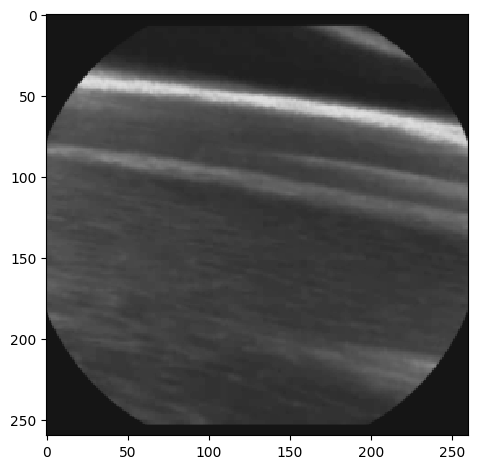

In [ ]:
imshow(imagen)

**Ahora vamos a hacer lo mismo para todas las imagenes**

In [ ]:
datos['image_filename']

0          im_4_0.png
1         im_21_0.png
2          im_9_0.png
3          im_8_0.png
4         im_15_0.png
            ...      
5058    im_114_55.png
5059      im_7_55.png
5060     im_52_55.png
5061     im_10_55.png
5062    im_111_55.png
Name: image_filename, Length: 5063, dtype: object

In [ ]:
%time  img = datos['image_filename'].apply(lambda x: imread(ruta + x, as_gray=True))

CPU times: user 58.3 s, sys: 19.4 s, total: 1min 17s
Wall time: 28min 42s


<h2>Respaldamos el objeto img en un archivo pickle.<h2>

(si quieres conocer más sobre pickles de python, revisa [este enlace](https://programacion.net/articulo/los_pickles_de_python_1860))

In [ ]:
# # Guardar en archivo pickle
# ruta2 = '/content/drive/MyDrive/Datos/DatosCancer/' # directorio donde se guardará el
# pickle.dump(img, open (ruta2 + "imagenes_numpy.pkl", 'wb'))

In [12]:
# Leer archivo pickle
ruta2 = '/content/drive/MyDrive/Datos/DatosCancer/'
img = pickle.load(open(ruta2 + "imagenes_numpy.pkl", 'rb'))

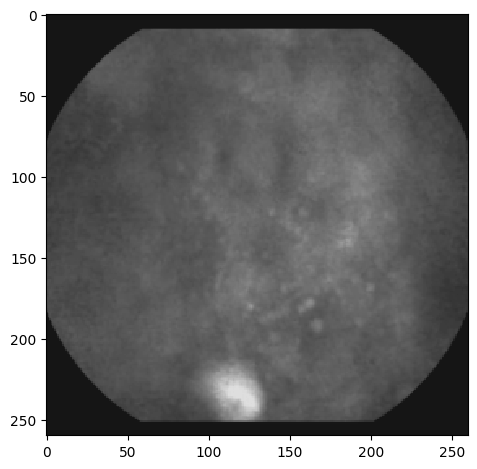

In [13]:
imshow(img[47])

- Dimensión 0: 260 renglones de pixeles de arriba a abajo
- Dimensión 1: 260 columnas de pixeles de izquierda a derecha


####  Transformar imágenes en vectores

In [ ]:
# Una serie de pandas es también una secuencia (como lo son las listas,
# las tuplas, las cadenas de caracteres o los vectores de numpy).

type(img)

pandas.core.series.Series

In [ ]:
# Cantidad de elementos en la serie
img.shape

(5063,)

In [14]:
# Cada elemento de mi secuencia es una matriz de 260 x 260
img[3673].shape

(260, 260)

Lo primero es transformar la secuencia de matrices img en una sola matriz

In [16]:
IMG = np.stack(img, axis=0)   # Toma una secuencia de matrices y las apila a lo largo
                              # de un tercer eje para hacer una solo arreglo
IMG.shape

(5063, 260, 260)

Despues aplanar la matriz de 2D (260x260 pixeles) de cada imagen, para obtener un vector por imagen.

In [18]:
X = IMG.reshape(5063, 67600)
X.shape

(5063, 67600)

##### Visualizamos ejemplos de ambas clases de imagenes

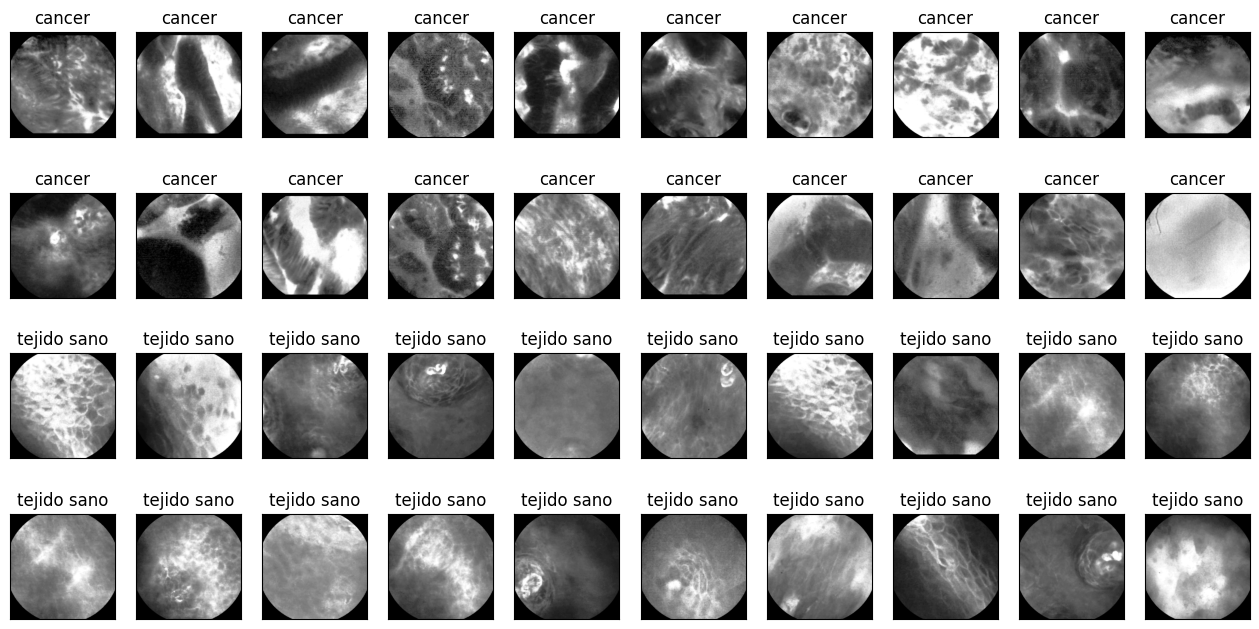

In [19]:
# Con el método GroupBy de Pandas separamos el data frame en dos, de acuerdo
# la nuestra etiqueta.
porClase = datos.groupby('class_number')

# Elijimos al azar n muestras de cada subconjunto y guardamos la posición de las
# imagenes cancerigenas en la lista "c" y en  "s" las de tejido sano.
n = 20
c = random.sample(porClase.get_group(1).index.tolist(), n)
s = random.sample(porClase.get_group(0).index.tolist(), n)


# Creamos el espacio para las 40 imagenes que vamos a desplegar
fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 4

# Desplegamos las imagenes
for i in range(0, 40):
    fig.add_subplot( rows, columns, i+1)
    if i < 20:
        plt.imshow(img[c[i]], cmap='Greys_r')
        plt.title('cancer')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(img[s[i-20]], cmap='Greys_r')
        plt.title('tejido sano')
        plt.xticks([])
        plt.yticks([])
plt.show()

## Paso 3. Construcción de nuestro clasificador

### 3.1  Crear subconjuntos de entrenamiento y prueba



In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('Tejido Sano:        ', counts[0],'\nDisplasia o Cáncer: ', counts[1],'\n')


print("Test set")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('Tejido Sano:         ', counts[0],'\nDisplasia o Cáncer: ', counts[1],'\n')

Training set
X:  (3544, 67600)
y:  (3544,)
Tejido Sano:         1043 
Displasia o Cáncer:  2501 

Test set
X:  (1519, 67600)
y:  (1519,)
Tejido Sano:          426 
Displasia o Cáncer:  1093 



### 3.2  Entrenamiento



In [21]:
model = Perceptron(max_iter=1000, random_state=0, verbose=False)
model.fit(X_train, y_train)

print("Iterations: ", model.n_iter_)

Iterations:  44


In [22]:
# Guardamos los coeficientes del modelo
betas = model.coef_
betas.shape

(1, 67600)

In [23]:
beta0 = model.intercept_
beta0

array([-42.])

In [24]:
betas[0, 50310:50320]

array([ -1.92002706,  26.43550275,  48.33832196,  60.5412651 ,
        36.79920392,  20.46658157,  -2.35208118, -16.18895686,
       -16.80207686,   4.81493412])

### 3.3 Pedicción

In [27]:
y_predict = model.predict(X_test)  # Clasifica cada imagen de X_test
y_predict[:20]

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

### 3.4 Evaluación

In [ ]:
y_test.to_numpy()[:20]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
print("Exactitud conjunto entrenamiento: %.2f%%" % (model.score(X_train, y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model.score(X_test, y_test)*100.0))

Exactitud conjunto entrenamiento: 95.49%
Exactitud conjunto prueba: 90.19%


In [28]:
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_predict
        }
df = pd.DataFrame(data)
df

,Y_Real,Y_Prediccion
3284,0,0
142,1,1
2625,1,1
2066,1,1
72,0,1
...,...,...
1569,1,1
5057,1,1
1422,0,0
2044,1,1


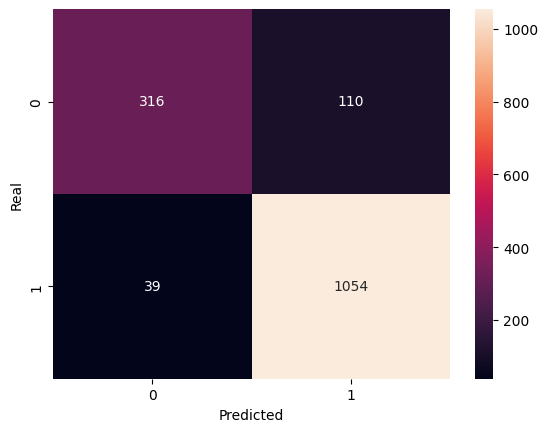

In [30]:
# Matriz de confusión

confusion_matrix = pd.crosstab(df['Y_Real'],
                               df['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Predicted'])
confusion_matrix
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

## Paso 4. Entrenamiento de perceptron utilizando margen

In [ ]:
model2 = Perceptron(max_iter=1000,
                    random_state=0,
                    verbose=False,
                    penalty='l2',
                    alpha=0.0001)
model2.fit(X_train,y_train)

print("Exactitud conjunto entrenamiento: %.2f%%" % (model2.score(X_train, y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model2.score(X_test, y_test)*100.0))


Exactitud conjunto entrenamiento: 77.48%
Exactitud conjunto prueba: 77.49%


In [ ]:
model3 = Perceptron(max_iter=1000,
                    random_state=0,
                    verbose=False,
                    penalty='l2',
                    alpha=0.000005)

model3.fit(X_train,y_train)

print("Exactitud conjunto entrenamiento: %.2f%%" % (model3.score(X_train,
                                                                 y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model3.score(X_test,
                                                          y_test)*100.0))

Exactitud conjunto entrenamiento: 94.38%
Exactitud conjunto prueba: 90.06%


In [ ]:
model4 = Perceptron(max_iter=1000,  random_state=0, verbose=False,
                    penalty='l2', alpha=0.000001)
model4.fit(X_train,y_train)

print("Exactitud conjunto entrenamiento: %.2f%%" % (model4.score(  X_train, y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model4.score(X_test, y_test)*100.0))

Precisión conjunto entrenamiento: 98.59%
Precisión conjunto prueba: 92.03%
